In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

Как применить законы статистики к данным ?
Для этого стоит использовать центральную передельную теорему. 

Сколько элементов сумм использовано в коде?
В коде использовано 100000 сумм, сложение которых приводит к колоколообразному графику нормального распределения.

(100000,)


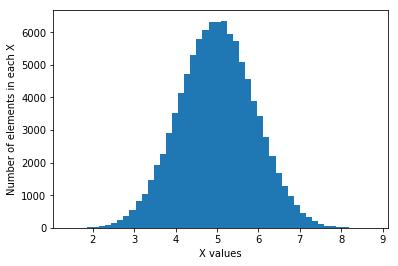

Wall time: 600 ms


In [2]:
%%time
number_of_sums = 100000
number_of_randoms = 10
X1 = np.zeros((number_of_sums))
print(X1.shape)
for i in range(number_of_sums):
    X1[i] = np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

Чему равна матрица ковариаций для графика?
Матрица ковариации равна C = [[1,0.99],[0.99,1]].

Построить преобразование с помощью вычисленной выше матрицы.

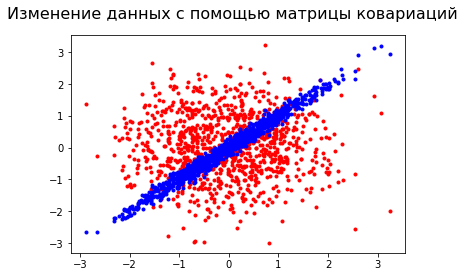

In [3]:
import numpy.linalg as la
n = 1000
C = [[1,0.99],[0.99,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически.

Угол наклона примерно 45 градусов.

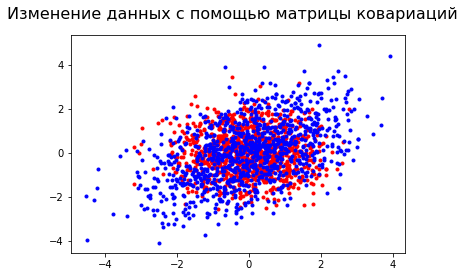

In [4]:
import numpy.linalg as la
n = 1000
C = [[2,1],[1,2]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16) 
plt.plot(X[:,0], X[:,1], 'r.');
plt.plot(Y[0,:], Y[1,:], 'b.');

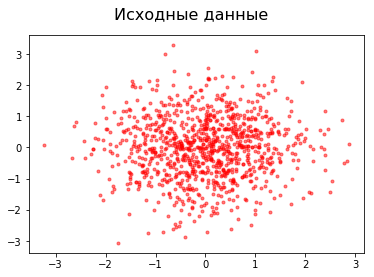

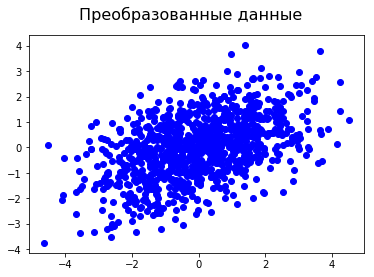

In [5]:
mu, sigma = 0, 1 # mean and standard deviation
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = np.matrix('2 1; 1 2')
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

In [6]:
import math
i = 45
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)

генерация данных:  2.926349170266426
теоритический подсчет:  [[2.89399666]]


При большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?
Да, вполне!

Посчитать как меняется вариация в зависимости от выбора собственного вектора.

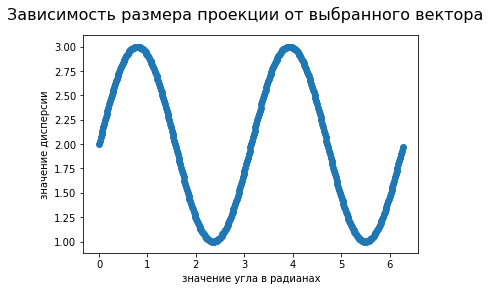

In [7]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

Загрузить таблицу.
Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [8]:
import io
import requests
url = "http://yustiks.ru/avocado.csv"
df = pd.read_csv(url)

In [9]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(df[['AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = ['AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
df_norm.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0


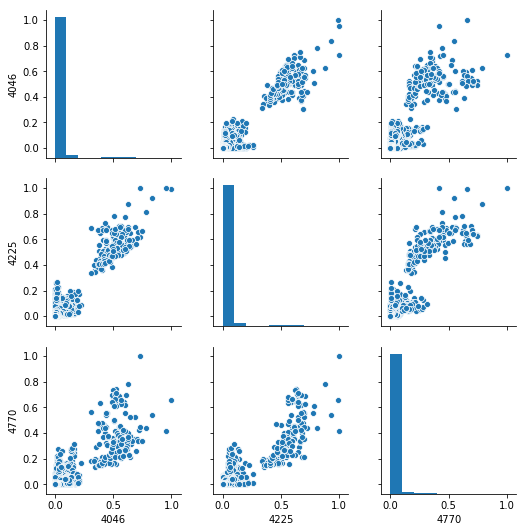

In [12]:
sns.pairplot(df_norm[['4046', '4225', '4770']]);

Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

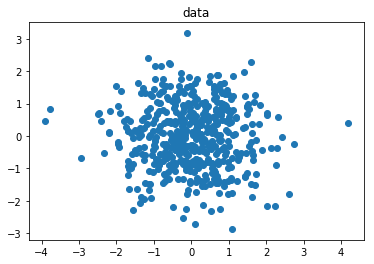

In [14]:
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x,y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('data');

In [15]:
# посчитать ковариацию переменных (разброс относительно друг друга)
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# матрица ковариаций
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# считаем матрицу ковариаций для вектора X
cov_mat(X.T) # (or with np.cov(X.T))

array([[ 1.0211461 , -0.03693127],
       [-0.03693127,  0.99514679]])

In [16]:
# находим собственные вектора и собственные значения
w, v = np.linalg.eig(cov_mat(X.T))
print(w)
print(v)

[1.04729884 0.96899405]
[[ 0.81609652  0.57791563]
 [-0.57791563  0.81609652]]


Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from numpy.random import randint
%matplotlib inline

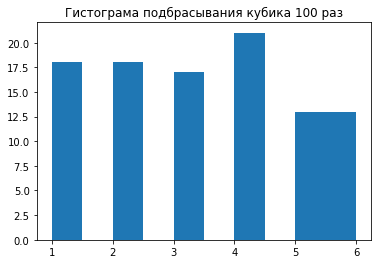

In [18]:
number_of_sums = 100
sample_dice = np.random.randint(1, 7, size=number_of_sums)
plt.hist(sample_dice);
plt.title('Гистограма подбрасывания кубика 100 раз');